# 0. GPU 확인

In [1]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16214229673548696798,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 23399170048
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2677997642249062536
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6"]

# 1. 이미지 전처리

## 1) path 설정

### train_data

In [2]:
train_data_original_img_path = './data/UNET/img_20000/resize_128/train_data/original_img'
train_data_resized_img_path = './data/UNET/img_20000/resize_128/train_data/resized_img'

### test_data

In [3]:
test_data_original_img_path = './data/UNET/img_20000/resize_128/test_data/original_img'
test_data_resized_img_path = './data/UNET/img_20000/resize_128/test_data/resized_img'

## 2) 이미지 목록 확인

In [4]:
import glob
import os
from os import listdir, makedirs
from os.path import isfile, join

In [5]:
def find_img_name_list(original_img_path) :
    img_name_list = list(filter(lambda f: isfile(join(original_img_path, f)), listdir(original_img_path)))
    
    return img_name_list

### train_data

In [6]:
train_data_img_name_list = find_img_name_list(train_data_original_img_path)

In [7]:
print(len(train_data_img_name_list))
print(train_data_img_name_list[:3])

19244
['ILSVRC2012_val_00033486.JPEG', 'ILSVRC2012_val_00039980.JPEG', 'ILSVRC2012_val_00002131.JPEG']


### test_data

In [8]:
test_data_img_name_list = find_img_name_list(test_data_original_img_path)

In [9]:
print(len(test_data_img_name_list))
print(test_data_img_name_list[:3])

98
['ILSVRC2012_val_00045820.JPEG', 'ILSVRC2012_val_00018061.JPEG', 'ILSVRC2012_val_00000070.JPEG']


## 3) 흑백 이미지 삭제

In [10]:
from PIL import Image
import os
import numpy as np
import time
from IPython.display import clear_output

In [11]:
def remove_gray_img(img_name_list, original_img_path) :
    start = time.time()

    i = 0
    for img_name in img_name_list:
        
        clear_output(wait=True)
        
        original_img = Image.open(os.path.join(original_img_path, img_name))
        pix = np.array(original_img)
        if pix.ndim != 3 :
            os.remove(os.path.join(original_img_path, img_name))
            
        i += 1
        print('진행 상황 : ', i,'/',len(img_name_list))
        print('진행 시간 : ', round((time.time() - start), 2))

    print('총 걸린 시간 : ', round((time.time() - start),2), '초')

### train_data

In [12]:
remove_gray_img(train_data_img_name_list, train_data_original_img_path)
train_data_img_name_list = list(filter(lambda f: isfile(join(train_data_original_img_path, f)), listdir(train_data_original_img_path)))

진행 상황 :  19244 / 19244
진행 시간 :  73.08
총 걸린 시간 :  73.08 초


### test_data

In [13]:
remove_gray_img(test_data_img_name_list, test_data_original_img_path)
test_data_img_name_list = list(filter(lambda f: isfile(join(test_data_original_img_path, f)), listdir(test_data_original_img_path)))

진행 상황 :  98 / 98
진행 시간 :  0.41
총 걸린 시간 :  0.41 초


## 4) 원본 이미지의 사이즈 저장

In [14]:
from PIL import Image
import pickle

In [15]:
def make_original_img_size_list(img_name_list, original_img_path) :
    original_img_size_list = []
    for img_name in img_name_list:
        original_img = Image.open(os.path.join(original_img_path, img_name))
        original_img_size_list.append(original_img.size)
    
    return original_img_size_list

In [16]:
def save_object_by_pickle(obj, file_path):
    pickle.dump(obj, open(file_path, 'wb'), protocol=4)

### test_data (만 필요) 

In [17]:
test_data_original_img_size_list = make_original_img_size_list(test_data_img_name_list, test_data_original_img_path)

In [18]:
print(len(test_data_original_img_size_list))
print(test_data_original_img_size_list[:3])

98
[(375, 500), (500, 448), (334, 500)]


In [19]:
test_data_original_img_size_path = './data/UNET/img_20000/resize_128/test_data/original_img_size.pkl'

In [20]:
save_object_by_pickle(test_data_original_img_size_list, test_data_original_img_size_path)

## 5) resized 및 저장

In [21]:
import cv2
import time
from IPython.display import clear_output
import os

In [22]:
def createDirectory(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print("Error: Failed to create the directory.")

In [23]:
def resizing_img(img_name_list, original_img_path, resized_img_path, resize_size) :
    start = time.time()

    i = 0
    for img_name in img_name_list :

        clear_output(wait=True)


        try:
            original_img = cv2.imread(os.path.join(original_img_path, img_name))
            resized_img = cv2.resize(original_img, dsize = resize_size, interpolation = cv2.INTER_CUBIC)
            createDirectory(resized_img_path)
            cv2.imwrite(os.path.join(resized_img_path, img_name), resized_img)
        except:
            print('{}가 변환되지 않았습니다.'.format(img_name))


        i += 1
        print('진행 상황 : ', i,'/',len(img_name_list))
        print('진행 시간 : ', round((time.time() - start), 2))

    print('총 걸린 시간 : ', round((time.time() - start),2), '초')

### train_data

In [24]:
resizing_img(train_data_img_name_list, train_data_original_img_path, train_data_resized_img_path, (128, 128))

진행 상황 :  19244 / 19244
진행 시간 :  91.22
총 걸린 시간 :  91.22 초


### test_data

In [25]:
resizing_img(test_data_img_name_list, test_data_original_img_path, test_data_resized_img_path, (128, 128))

진행 상황 :  98 / 98
진행 시간 :  0.5
총 걸린 시간 :  0.5 초


## 6) 이미지 RGB 값 pickle 저장

In [26]:
import numpy as np
import time
from IPython.display import clear_output
from PIL import Image
from tensorflow.keras import datasets, utils, backend

import glob
import os
from os import listdir, makedirs
from os.path import isfile, join

import pickle

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [27]:
def load_my_img(img_name_list, resized_img_path) :
    start = time.time()

    i = 0
    
    img_pixel_list = [0]*len(img_name_list)
    for img_name in img_name_list :

        clear_output(wait=True)


        resized_img = Image.open(os.path.join(resized_img_path, img_name))
        pixel_array = np.array(resized_img)
        pixel_list = pixel_array.tolist()
        img_pixel_list[i] = pixel_list

        i += 1
        print('진행 상황 : ', i,'/',len(img_name_list))
        print('진행 시간 : ', round((time.time() - start), 2))

    print('총 걸린 시간 : ', round((time.time() - start),2), '초')
    
    img = np.array(img_pixel_list)
    
    return img

In [28]:
def save_object_by_pickle(obj, file_path):
    with open(file_path, 'wb') as f :
        pickle.dump(obj, f)

### train_data

In [29]:
train_img_pixel_values = load_my_img(train_data_img_name_list, train_data_resized_img_path)

진행 상황 :  19244 / 19244
진행 시간 :  135.56
총 걸린 시간 :  135.56 초


In [30]:
train_data_img_pixel_values_path = './data/UNET/img_20000/resize_128/train_data/img_pixel_values.pkl'

In [31]:
save_object_by_pickle(train_img_pixel_values, train_data_img_pixel_values_path)

### test_data

In [32]:
test_img_pixel_values = load_my_img(test_data_img_name_list, test_data_resized_img_path)

진행 상황 :  98 / 98
진행 시간 :  0.31
총 걸린 시간 :  0.31 초


In [33]:
test_data_img_pixel_values_path = './data/UNET/img_20000/resize_128/test_data/img_pixel_values.pkl'

In [34]:
save_object_by_pickle(test_img_pixel_values, test_data_img_pixel_values_path)

In [35]:
raise SystemExit("Stop right there!")

SystemExit: Stop right there!

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3449: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# 여기까지 실행

# 여기서부터 다시 시작

# 2. 학습

## 1) 이미지 RGB 값 pickle 불러오기

In [1]:
import pickle
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
def load_object_by_pickle(pklfile):
    return pickle.load(open(pklfile, 'rb'))

In [3]:
train_data_img_pixel_values_path = './data/UNET/img_20000/resize_128/train_data/img_pixel_values.pkl'

In [4]:
train_img = load_object_by_pickle(train_data_img_pixel_values_path)

## 2) Train Dataset 구축

In [5]:
from tensorflow.keras import backend

In [6]:
class DATA():
    def __init__(self, img_data) :

        if backend.image_data_format() == 'channels_first':
            n_ch, img_rows, img_cols = img_data.shape[1:]
            input_shape = (1, img_rows, img_cols)
        else:
            img_rows, img_cols, n_ch = img_data.shape[1:]
            input_shape = (img_rows, img_cols, 1)

        img_data = img_data.astype('float32') / 255.0
    
        def RGB2Gray(img, fmt):
            if fmt == 'channels_first':
                R = img[:, 0:1]
                G = img[:, 1:2]
                B = img[:, 2:3]
            else:
                R = img[..., 0:1]
                G = img[..., 1:2]
                B = img[..., 2:3]
            return 0.299 * R + 0.587 * G + 0.114 * B
    
        x = RGB2Gray(img_data, backend.image_data_format())
        
        self.input_shape = input_shape
        self.x, self.y = x, img_data
        self.n_ch = n_ch

In [7]:
data_train = DATA(train_img)
print(data_train.input_shape, data_train.x.shape)

(128, 128, 1) (19244, 128, 128, 1)


In [8]:
X_train = data_train.x
Y_train = data_train.y

## 3) 모델 구축

In [9]:
from tensorflow.keras import models, backend
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, UpSampling2D, BatchNormalization, Concatenate, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [10]:
def conv(x, n_f, mp_flag=True):
    x = MaxPooling2D((2, 2), padding='same')(x) if mp_flag else x
    x = Conv2D(n_f, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.05)(x)
    x = Conv2D(n_f, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

def deconv_unet(x, e, n_f, ic):
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(n_f, (2, 2), padding='same')(x)
    x = Concatenate(axis=ic)([x, e])
    x = Conv2D(n_f, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(n_f, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

def UNET(org_shape, n_ch):
    ic = 3 if backend.image_data_format() == 'channels_last' else 1
    # Input
    original = Input(shape=org_shape)

    # Encoding
    e1 = conv(original, 64, mp_flag=False)
    e2 = conv(e1, 128)
    e3 = conv(e2, 256)
    e4 = conv(e3, 512)

    encoded = conv(e4, 1024)

    # Decoding
    x = deconv_unet(encoded, e4, 512, ic)
    x = deconv_unet(x, e3, 256, ic)
    x = deconv_unet(x, e2, 128, ic)
    x = deconv_unet(x, e1, 64, ic)

    decoded = Conv2D(n_ch, (1, 1), padding='same')(x)


    model = Model(inputs=original, outputs=decoded)
    optimizer = Adam(lr=0.001)

    model.compile(loss='mse', optimizer=optimizer, metrics=['acc'])

    return model

In [11]:
unet = UNET(data_train.input_shape, data_train.n_ch)
unet.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 128, 128, 64) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


## 5) Callback 설정

In [12]:
import tensorflow.keras
import os

In [13]:
def createDirectory(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print("Error: Failed to create the directory.")

In [14]:
epochs=100
batch_size=64

img_num = 20000
resize_size = 128

In [15]:
model_save_folder = './data/UNET/img_20000/resize_128/trained_model'
model_filename_front = model_save_folder + '/unet_model-img_num_{}-resize_size_{}-batch_size_{}-'.format(img_num, resize_size, batch_size)
model_filename = model_filename_front + '{epoch}-{val_loss:.4f}-{loss:.4f}.h5'

In [16]:
createDirectory(model_save_folder)

In [17]:
earlystopping = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)
checkpoint = tensorflow.keras.callbacks.ModelCheckpoint(model_filename, minitor='val_loss', mode='min', save_best_only=True)

## 6) 모델 학습 

In [18]:
history = unet.fit(X_train, Y_train,
                   epochs=epochs,
                   batch_size=batch_size,
                   shuffle=True,
                   validation_split=0.2,
                   callbacks=[earlystopping, checkpoint])

Epoch 1/100
241/241 [==============================] - 73s 279ms/step - loss: 0.0398 - acc: 0.4271 - val_loss: 0.0640 - val_acc: 0.5228
Epoch 2/100
241/241 [==============================] - 65s 269ms/step - loss: 0.0095 - acc: 0.4516 - val_loss: 0.0228 - val_acc: 0.5664
Epoch 3/100
241/241 [==============================] - 65s 270ms/step - loss: 0.0088 - acc: 0.4648 - val_loss: 0.0086 - val_acc: 0.5052
Epoch 4/100
241/241 [==============================] - 65s 270ms/step - loss: 0.0087 - acc: 0.4735 - val_loss: 0.0076 - val_acc: 0.4895
Epoch 5/100
241/241 [==============================] - 65s 270ms/step - loss: 0.0085 - acc: 0.4817 - val_loss: 0.0074 - val_acc: 0.5087
Epoch 6/100
241/241 [==============================] - 65s 271ms/step - loss: 0.0084 - acc: 0.4846 - val_loss: 0.0077 - val_acc: 0.5570
Epoch 7/100
241/241 [==============================] - 65s 271ms/step - loss: 0.0084 - acc: 0.4890 - val_loss: 0.0082 - val_acc: 0.5414
Epoch 8/100
241/241 [===========================

## 7) 학습 loss 시각화

In [19]:
import matplotlib.pyplot as plt

In [29]:
def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accracy')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()


def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.ylim(0, 0.075)
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()


def plot_history(history):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plot_acc(history)
    plt.subplot(1, 2, 2)
    plot_loss(history)

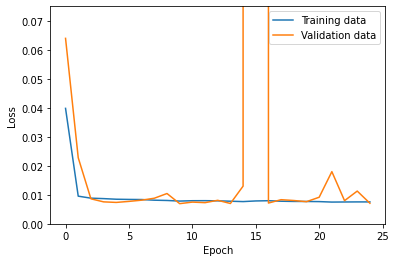

In [30]:
plot_loss(history)

In [22]:
raise SystemExit("Stop right there!")

SystemExit: Stop right there!

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3449: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# 여기까지 실행

# 여기서부터 다시 시작

# 3. 예측

## 1) Test DataSet 구축

In [1]:
from tensorflow.keras import backend
import tensorflow as tf
import ssl
import pickle
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
class DATA():
    def __init__(self, img_data) :

        if backend.image_data_format() == 'channels_first':
            n_ch, img_rows, img_cols = img_data.shape[1:]
            input_shape = (1, img_rows, img_cols)
        else:
            img_rows, img_cols, n_ch = img_data.shape[1:]
            input_shape = (img_rows, img_cols, 1)

        img_data = img_data.astype('float32') / 255.0
    
        def RGB2Gray(img, fmt):
            if fmt == 'channels_first':
                R = img[:, 0:1]
                G = img[:, 1:2]
                B = img[:, 2:3]
            else:
                R = img[..., 0:1]
                G = img[..., 1:2]
                B = img[..., 2:3]
            return 0.299 * R + 0.587 * G + 0.114 * B
    
        x = RGB2Gray(img_data, backend.image_data_format())
        
        self.input_shape = input_shape
        self.x, self.y = x, img_data
        self.n_ch = n_ch

In [3]:
def load_object_by_pickle(pklfile):
    return pickle.load(open(pklfile, 'rb'))

In [4]:
test_data_img_pixel_values_path = './data/UNET/img_20000/resize_128/test_data/img_pixel_values.pkl'

In [5]:
test_img = load_object_by_pickle(test_data_img_pixel_values_path)

In [6]:
data_test = DATA(test_img)
print(data_test.input_shape, data_test.x.shape)

(128, 128, 1) (98, 128, 128, 1)


In [7]:
X_test = data_test.x
Y_test_real = data_test.y

## 2) 학습된 모델 불러오기

In [8]:
from tensorflow.keras.models import load_model

In [9]:
model_path = './data/UNET/img_20000/resize_128/trained_model/unet_model-img_num_20000-resize_size_128-batch_size_64-10-0.0070-0.0078.h5'

In [10]:
trained_model  = load_model(model_path)

## 3) 예측 진행

In [11]:
Y_test_predicted = trained_model.predict(X_test)

## 4) 예측 결과 시각화

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import minmax_scale

In [13]:
def show_images(x, y_real, y_predicted):
    if backend.image_data_format() == 'channels_first':
        print(y_real.shape)
        y_real = y_real.swapaxes(1, 3).swapaxes(1, 2)
        print(y_real.shape)
        y_predicted = y_predicted.swapaxes(1, 3).swapaxes(1, 2)

        x = x[:, 0, ...]

    else:
        x = x[..., 0]
        
    n = 10
    plt.figure(figsize=(20, 6))
    for i in range(n):

        ax = plt.subplot(3, n, i + 1)
        if x.ndim < 4:
            plt.imshow(x[i], cmap='gray')
        else:
            plt.imshow(x[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(y_predicted[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, n, i + 1 + n * 2)
        plt.imshow(y_real[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


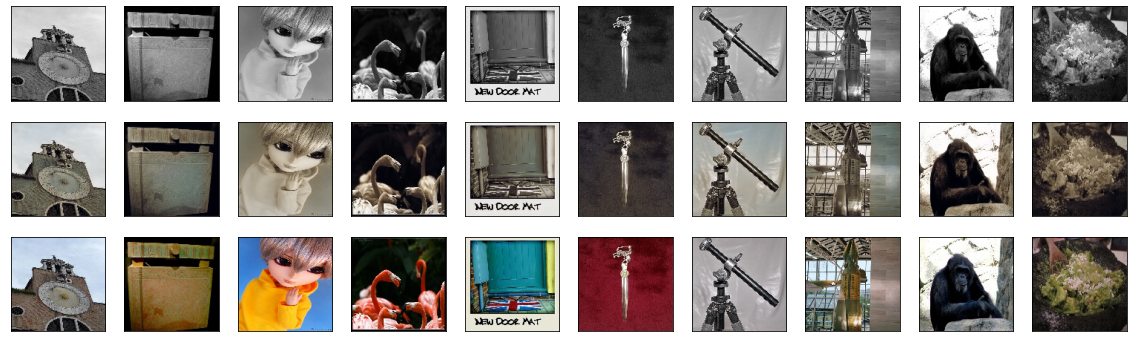

In [14]:
show_images(X_test, Y_test_real, Y_test_predicted)

## 4) 원본 크기와 이름 불러오기

In [15]:
import glob
import os
from os import listdir, makedirs
from os.path import isfile, join

In [16]:
test_data_original_img_path = './data/UNET/img_20000/resize_128/test_data/original_img'
test_data_resized_img_path = './data/UNET/img_20000/resize_128/test_data/resized_img'
test_data_img_name_list = list(filter(lambda f: isfile(join(test_data_original_img_path, f)), listdir(test_data_original_img_path)))

In [17]:
test_data_original_img_size_path = './data/UNET/img_20000/resize_128/test_data/original_img_size.pkl'
test_data_original_img_size = load_object_by_pickle(test_data_original_img_size_path)

## 5) 예측된 이미지 size 복원 후 저장

In [18]:
import cv2
import time
from IPython.display import clear_output

In [19]:
def resize_and_save_restored_img(img_name_list, decoded_imgs, original_img_size, restored_img_path) :
    start = time.time()
    
    for i in range(len(img_name_list)) :

        clear_output(wait=True)

        restored_img_name = img_name_list[i]

        try:
            resized_restored_img = cv2.resize(decoded_imgs[i], dsize = original_img_size[i], interpolation = cv2.INTER_CUBIC)
            resized_restored_img = resized_restored_img*255.0
            resized_restored_img = resized_restored_img.astype('int64')
            cv2.imwrite(os.path.join(restored_img_path, restored_img_name), resized_restored_img)

        except:
            print('{}가 변환되지 않았습니다.'.format(restored_img_name))

        i += 1
        print('진행 상황 : ', i,'/',len(img_name_list))
        print('진행 시간 : ', round((time.time() - start), 2))

    print('총 걸린 시간 : ', round((time.time() - start),2), '초')

In [20]:
def load_object_by_pickle(pklfile):
    return pickle.load(open(pklfile, 'rb'))

In [21]:
def createDirectory(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print("Error: Failed to create the directory.")

In [22]:
restored_img_path = './data/UNET/img_20000/resize_128/test_data/restored_img'

In [23]:
createDirectory(restored_img_path)

In [24]:
resize_and_save_restored_img(test_data_img_name_list, Y_test_predicted, test_data_original_img_size, restored_img_path)

진행 상황 :  98 / 98
진행 시간 :  0.41
총 걸린 시간 :  0.41 초
